In [1]:
#imports
import numpy as np
import pandas as pd
import requests
import json
import os
import re
from dotenv import load_dotenv
from IPython.display import Image

In [2]:
#Import IMDB's csv
df = pd.read_csv('Input/IMDb_movies.csv',encoding = 'latin-1')
'''
#visual
print(df.dtypes)
print(df.isnull().sum())
display(df.count())'''

'\n#visual\nprint(df.dtypes)\nprint(df.isnull().sum())\ndisplay(df.count())'

In [3]:
#Erasing unwanted columns
df = df.drop(columns = ['reviews_from_users','reviews_from_critics','votes','original_title','date_published','usa_gross_income','writer'])

In [4]:
#Importiing own cleaning functions
from Cleaning import removeNaN
from Cleaning import decader
from Cleaning import dollar_to_int
from Cleaning import create_table


In [5]:
#Erasing NaN from columns:
df = removeNaN(df, df['worlwide_gross_income'])
df = removeNaN(df, df['metascore'])
df = removeNaN(df, df['budget'])

In [6]:
#visual
'''print(df.isnull().sum())'''

'print(df.isnull().sum())'

In [7]:
#Adjusting currency columns in order to manipulate them.
df =df[df['budget'].str.startswith(('$'))].reset_index(drop=True)
df['budget']= dollar_to_int(df['budget'])
df['worlwide_gross_income']= dollar_to_int(df['worlwide_gross_income'])


In [8]:
#Creating decade,profit and profit_ratio columns
df['decade']= decader(df['year'])
df['profit']= df['worlwide_gross_income'] - df['budget']
df['profit_ratio'] =round(df['profit']/df['budget'], 2)

In [9]:
#Sorting df by profit_ratio
df = df.sort_values(by=['profit_ratio'],ascending=False).reset_index(drop=True)

In [10]:
#fixing punctual error in movie budget
df.iloc[0, df.columns.get_loc('budget')] = 10700000


In [11]:
#Correcting whole df due to changes
df['decade']= decader(df['year'])
df['profit']= df['worlwide_gross_income'] - df['budget']
df['profit_ratio'] =round(df['profit']/df['budget'], 2)
df['score']= decader(df['metascore']).astype('int64')
df = df.sort_values(by=['profit_ratio'],ascending=False).reset_index(drop=True)

In [12]:
#Sorting df by gross income
df = df.sort_values(by=['worlwide_gross_income'],ascending=False).reset_index(drop=True)
df.head()

imdb_title_id                                       title  year  \
0     tt4154796                           Avengers: Endgame  2019   
1     tt0499549                                      Avatar  2009   
2     tt0120338                                     Titanic  1997   
3     tt2488496  Star Wars: Episode VII - The Force Awakens  2015   
4     tt4154756                      Avengers: Infinity War  2018   

                        genre  duration country  \
0    Action, Adventure, Drama       181     USA   
1  Action, Adventure, Fantasy       162     USA   
2              Drama, Romance       194     USA   
3   Action, Adventure, Sci-Fi       138     USA   
4   Action, Adventure, Sci-Fi       149     USA   

                           language                  director  \
0  English, Japanese, Xhosa, German  Anthony Russo, Joe Russo   
1                  English, Spanish             James Cameron   
2         English, Swedish, Italian             James Cameron   
3                           English               J.J. Abrams   
4                           English  Anthony Russo, Joe Russo   

      production_company                                             actors  \
0         Marvel Studios  Robert Downey Jr., Chris Evans, Mark Ruffalo, ...   
1  Twentieth Century Fox  Sam Worthington, Zoe Saldana, Sigourney Weaver...   
2  Twentieth Century Fox  Leonardo DiCaprio, Kate Winslet, Billy Zane, K...   
3              Lucasfilm  Harrison Ford, Mark Hamill, Carrie Fisher, Ada...   
4         Marvel Studios  Robert Downey Jr., Chris Hemsworth, Mark Ruffa...   

                                         description  avg_vote     budget  \
0                    After the devastating events of       8.5  356000000   
1  A paraplegic Marine dispatched to the moon Pan...       7.8  237000000   
2  A seventeen-year-old aristocrat falls in love ...       7.8  200000000   
3  Three decades after the Empire's defeat, a new...       7.9  245000000   
4  The Avengers and their allies must be willing ...       8.5  321000000   

   worlwide_gross_income  metascore  decade      profit  profit_ratio  score  
0             2797800564       78.0    2010  2441800564          6.86     70  
1             2789968301       83.0    2000  2552968301         10.77     80  
2             2187463944       75.0    1990  1987463944          9.94     70  
3             2068223624       81.0    2010  1823223624          7.44     80  
4             2048359754       68.0    2010  1727359754          5.38     60

In [13]:
#Creating decade grouped table
decade_table = round((df.groupby('decade').agg({'budget':['max','mean'],"worlwide_gross_income":['max','mean'],"profit":["max",'mean']}))/1000000 , 0).astype('int64')
decade_table['profit_ratio']= round(df.groupby('decade').agg({"profit_ratio":"mean"}),2)
decade_table['n_movies']=df.groupby('decade').agg({'title':'count'})
decade_table

budget      worlwide_gross_income      profit      profit_ratio  \
          max mean                   max mean    max mean                
decade                                                                   
1920        1    1                     0    0     -1   -1        -0.97   
1930        4    2                   402   68    398   67        25.04   
1940        3    2                   122   19    119   18         7.33   
1950       15    3                    95   17     92   15         4.75   
1960       44    5                   216   28    212   23         6.84   
1970       55    7                   776   56    765   50        13.28   
1980       70   14                   793   49    782   35         3.81   
1990      200   31                  2187   85   1987   54         7.16   
2000      300   33                  2790   80   2553   47         7.57   
2010      356   39                  2798  123   2442   85         2.40   

       n_movies  
                 
decade           
1920          1  
1930          9  
1940         12  
1950         34  
1960         72  
1970        163  
1980        577  
1990        931  
2000       2265  
2010       2128

In [14]:
#Creating score grouped table
score_table = round((df.groupby('score').agg({'budget':['max','mean'],"worlwide_gross_income":['max','mean'],"profit":["max",'mean']}))/1000000 , 0).astype('int64')
score_table['profit_ratio']= round(df.groupby('score').agg({"profit_ratio":"mean"}),2)
score_table['n_movies']=df.groupby('score').agg({'title':'count'})
score_table

budget      worlwide_gross_income      profit      profit_ratio n_movies
         max mean                   max mean    max mean                      
score                                                                         
0         73   13                    85   10     55   -3        -0.29       23
10       109   22                   247   27    168    5         1.51      151
20       217   26                   605   41    388   15         1.08      394
30       230   33                  1104   62    894   30         1.73      865
40       300   35                  1124   83    955   48         1.55     1151
50       300   35                  1670  103   1520   67         2.17     1188
60       321   32                  2048  103   1727   71        14.17     1131
70       356   30                  2798  111   2442   81         4.42      745
80       317   26                  2790  136   2553  109        17.53      408
90       200   21                  1120  142   1026  121         9.54      124
100       15    4                   246   35    240   31         8.42       12

In [15]:
#Creating Country grouped table
country_table = round((df.groupby('country').agg({'budget':['max','mean'],"worlwide_gross_income":['max','mean'],"profit":["max",'mean']}))/1000000 , 0).astype('int64')
country_table['profit_ratio']= round(df.groupby('country').agg({"profit_ratio":"mean"}),2)
country_table['n_movies']=df.groupby('country').agg({'title':'count'})
country_table = country_table.sort_values(by=['n_movies'],ascending=False).reset_index()
country_table.head(50)

country budget      worlwide_gross_income      profit  \
                                 max mean                   max mean    max   
0                         USA    356   30                  2798   93   2553   
1                     UK, USA    250   38                  1109  124    909   
2                     USA, UK    250   51                  1342  159   1217   
3                 USA, Canada    200   30                   995   81    940   
4                USA, Germany    150   44                   546   97    433   
5                          UK    195   12                   246   24    241   
6                Germany, USA    140   38                   321   73    251   
7                 Canada, USA    110   23                   463   59    384   
8                 USA, France     98   23                   543   68    474   
9                 France, USA     90   25                   376   64    331   
10             USA, Australia    176   71                  1148  209    988   
11                 USA, Japan    160   43                   525  128    391   
12                USA, Mexico     85   26                   300   73    256   
13                     France     93   22                   264   31    171   
14                     Canada    125   12                    65    6     25   
15            UK, France, USA     60   27                   282   63    257   
16                      Japan     34   12                   348   69    329   
17             Australia, USA    135   31                   354   75    249   
18                 USA, India    175   59                   583  146    408   
19                 USA, China    185   60                   567  184    400   
20                  Australia     90   11                   328   47    319   
21           China, Hong Kong     94   34                   177   55    146   
22                South Korea     32    7                    75   29     66   
23                 UK, France     34   13                   210   37    176   
24           UK, Germany, USA     62   29                    92   25     54   
25                 China, USA    145   58                   856  177    756   
26            USA, UK, France     50   20                   164   54    127   
27  USA, United Arab Emirates    225   50                   624  110    399   
28                      China     63   32                   870  248    840   
29                     Mexico     12    3                    99   18     94   
30       USA, Germany, Canada     70   35                   307   82    262   
31             Hong Kong, USA    125   45                   347  100    257   
32                 Japan, USA     75   20                   634   97    559   
33            USA, UK, Canada    200   75                   746  274    546   
34                 USA, Spain    111   29                   296   57    185   
35                Mexico, USA     20    7                    87   20     77   
36             USA, Hong Kong     55   29                   446  153    416   
37            UK, Canada, USA    180   45                   357   89    177   
38                      Spain     18    6                    40   13     35   
39           USA, UK, Germany     92   47                   610  156    558   
40                 Italy, USA     45   16                    30    6     27   
41                 USA, Italy    150   46                   486  104    336   
42                  Hong Kong     15    9                    32   14     25   
43                     Russia     30    9                    68   24     46   
44                 UK, Canada     35   18                    49   13     34   
45            UK, USA, France    150   44                   245  125    205   
46                UK, Germany     15    9                    48   10     42   
47           USA, Germany, UK    200   88                   524  220    434   
48             Canada, France     60   16                    21    8    

In [16]:
#Exporting new cleaned csv and summary tables
'''df.to_csv('cleanIMDB.csv', index=False)
decade_table.to_csv('decade_table.csv', index=False)
score_table.to_csv('score_table.csv', index=False)
country_table.to_csv('country_table.csv', index=False)'''

"df.to_csv('cleanIMDB.csv', index=False)\ndecade_table.to_csv('decade_table.csv', index=False)\nscore_table.to_csv('score_table.csv', index=False)\ncountry_table.to_csv('country_table.csv', index=False)"

In [28]:
shortdf = df.head(3)

In [47]:
def requestIMG(code,token = os.getenv('apikey')):
    url = "https://movies-tvshows-data-imdb.p.rapidapi.com/"
    querystring = {"imdb":code,"type":"get-movies-images-by-imdb"}
    headers = {
         'x-rapidapi-host': "movies-tvshows-data-imdb.p.rapidapi.com",
         'x-rapidapi-key': token
          }
    response = requests.request("GET", url, headers=headers, params=querystring).json()
    imglink =response['poster']
    display(Image(imglink,width = 400, height = 200))


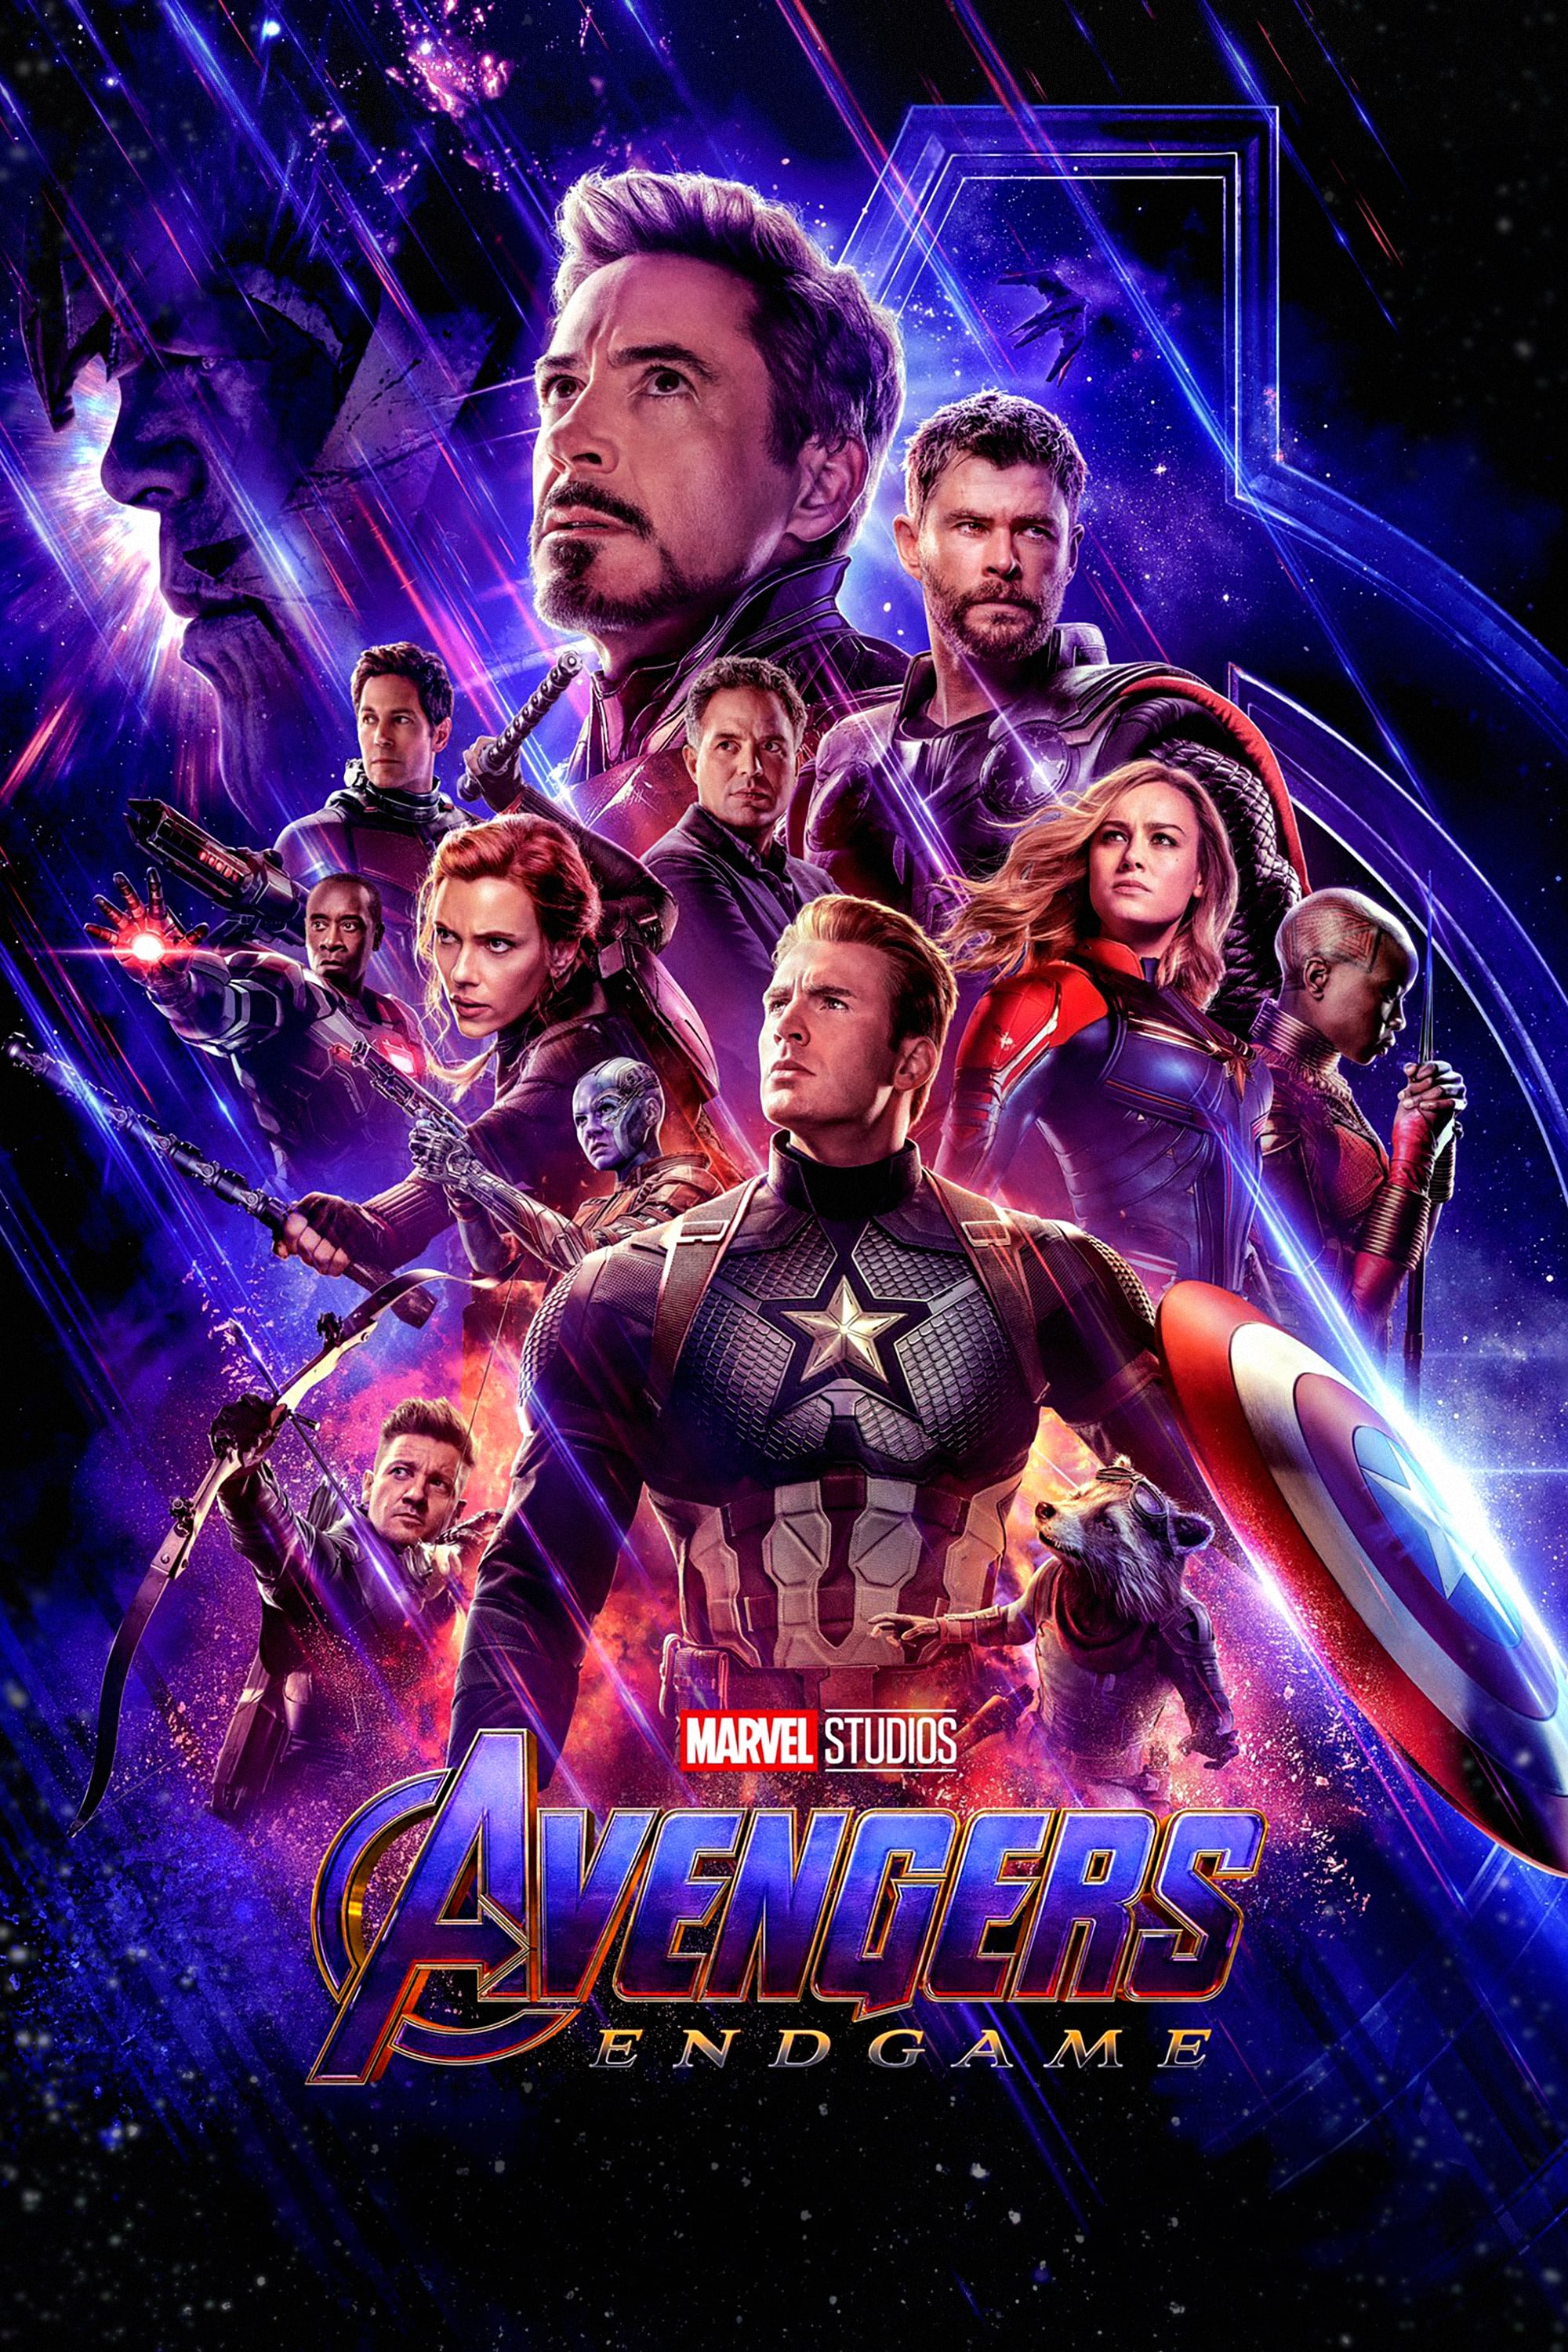

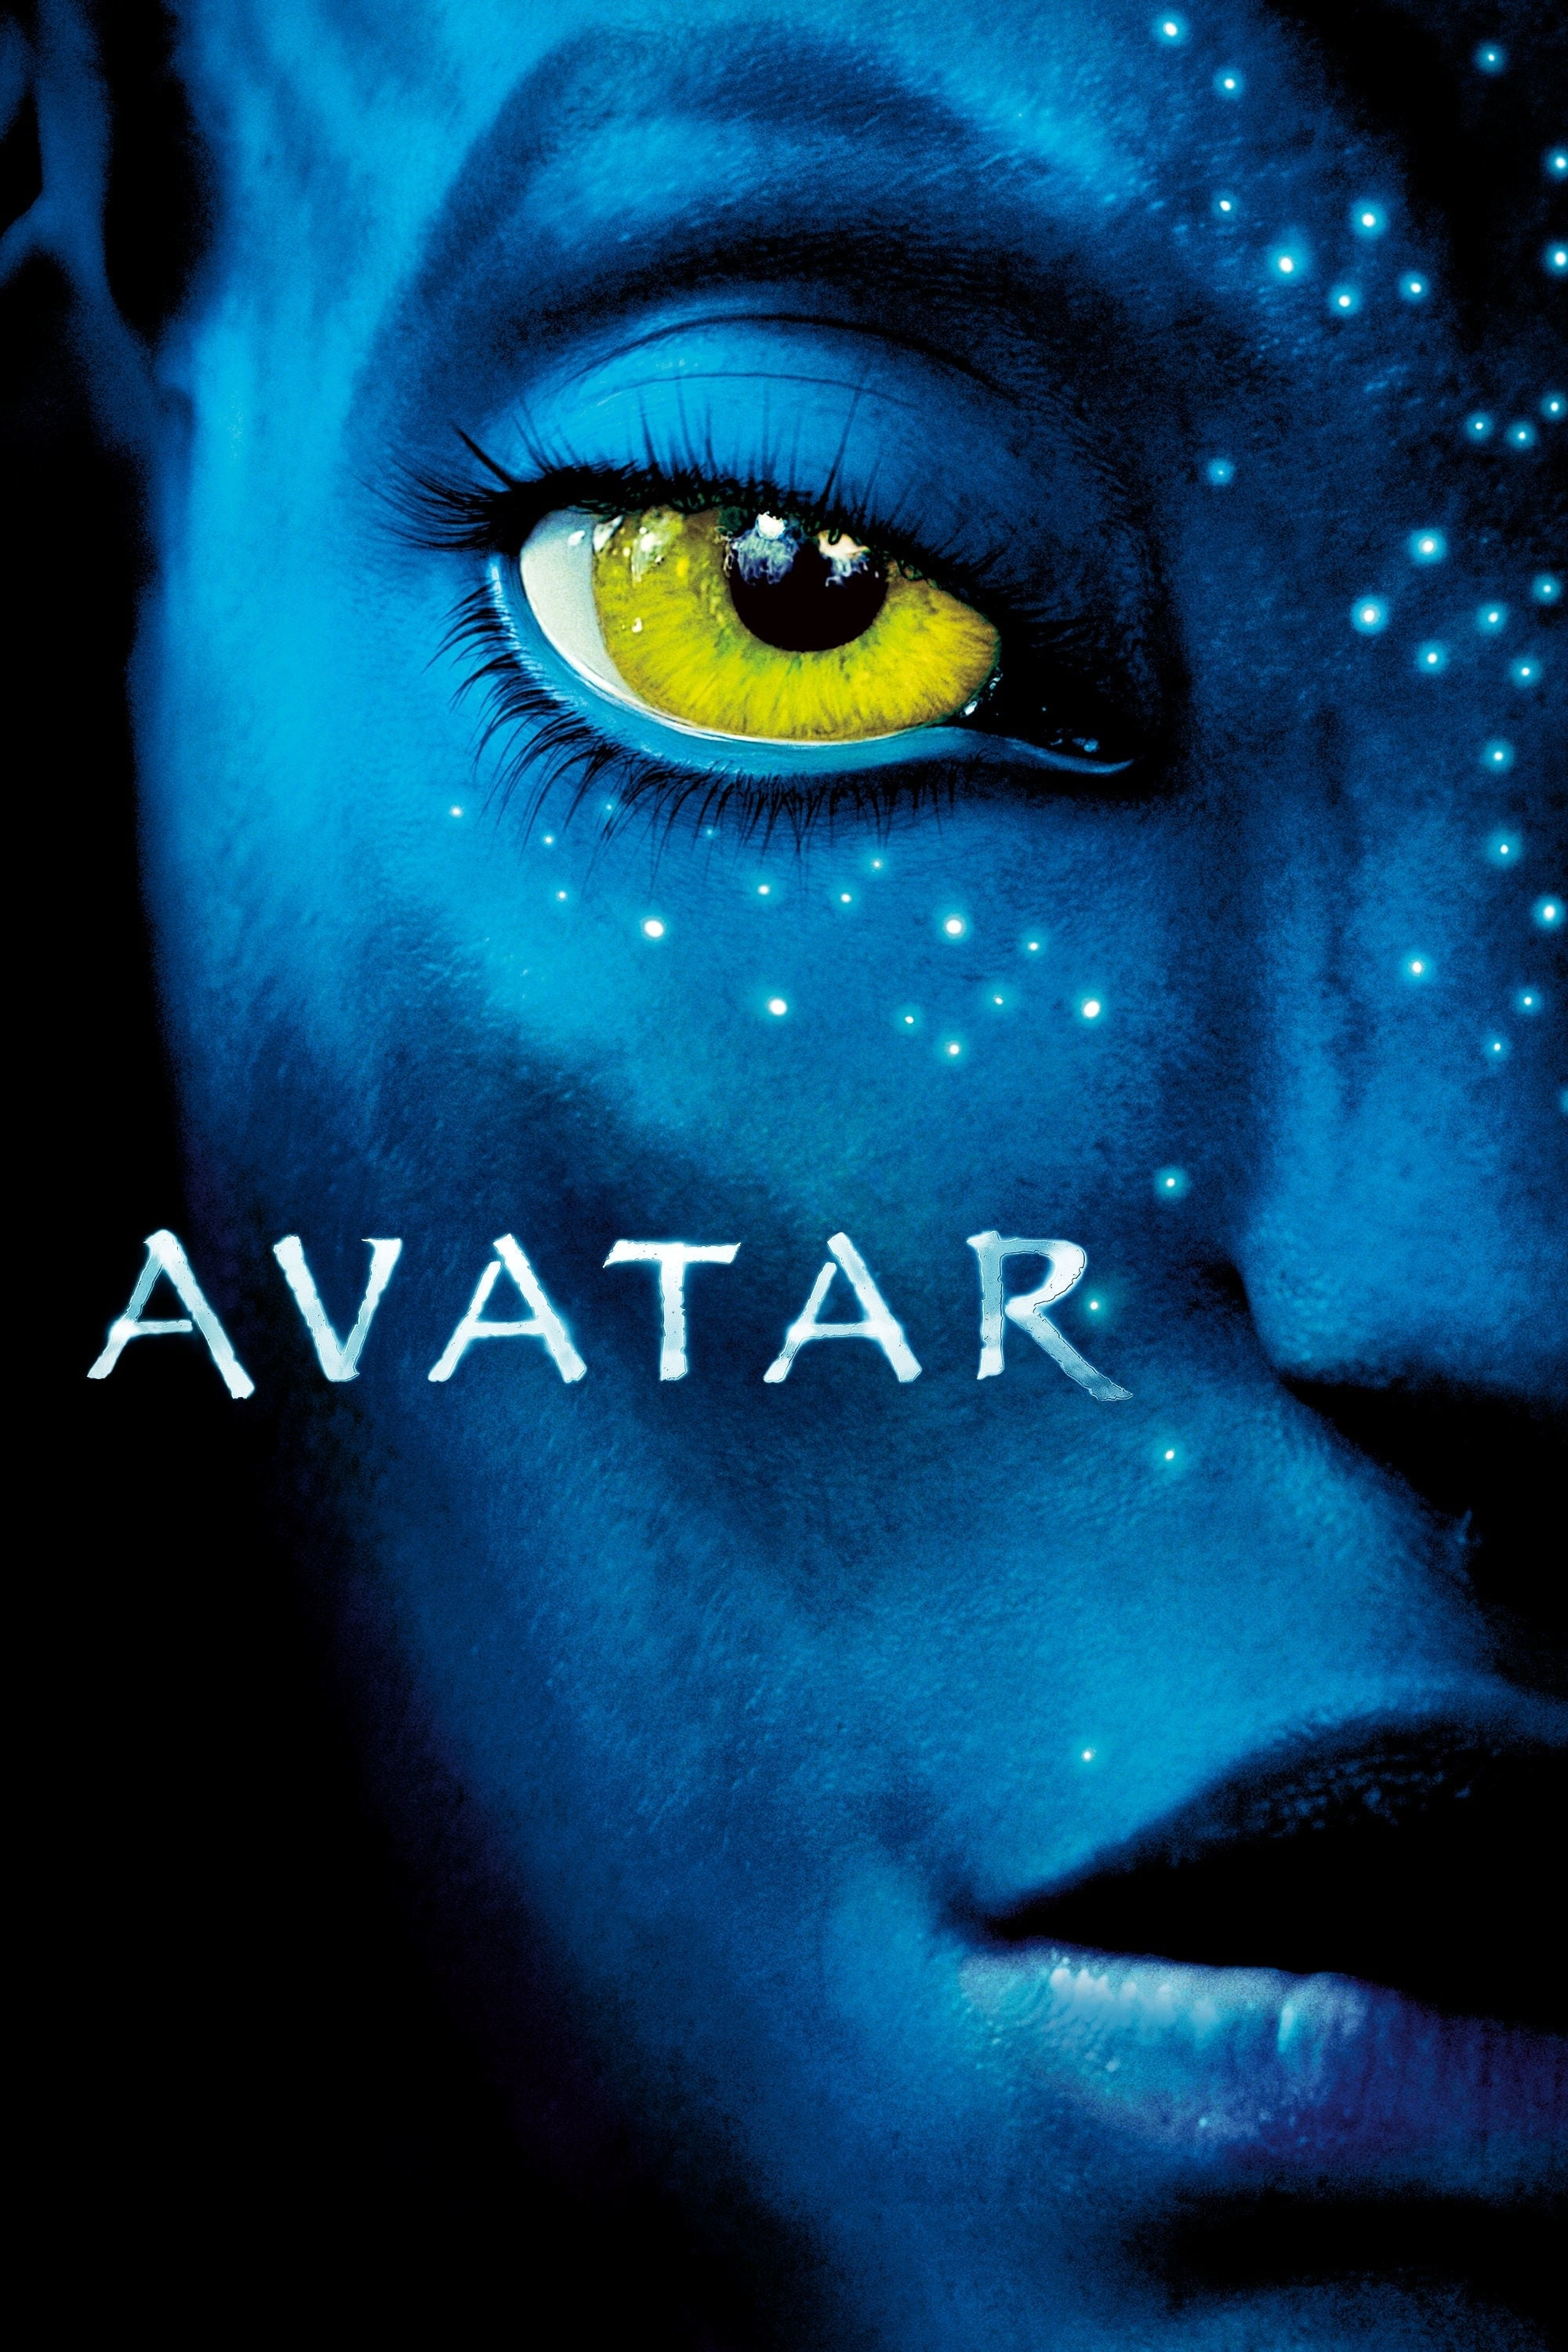

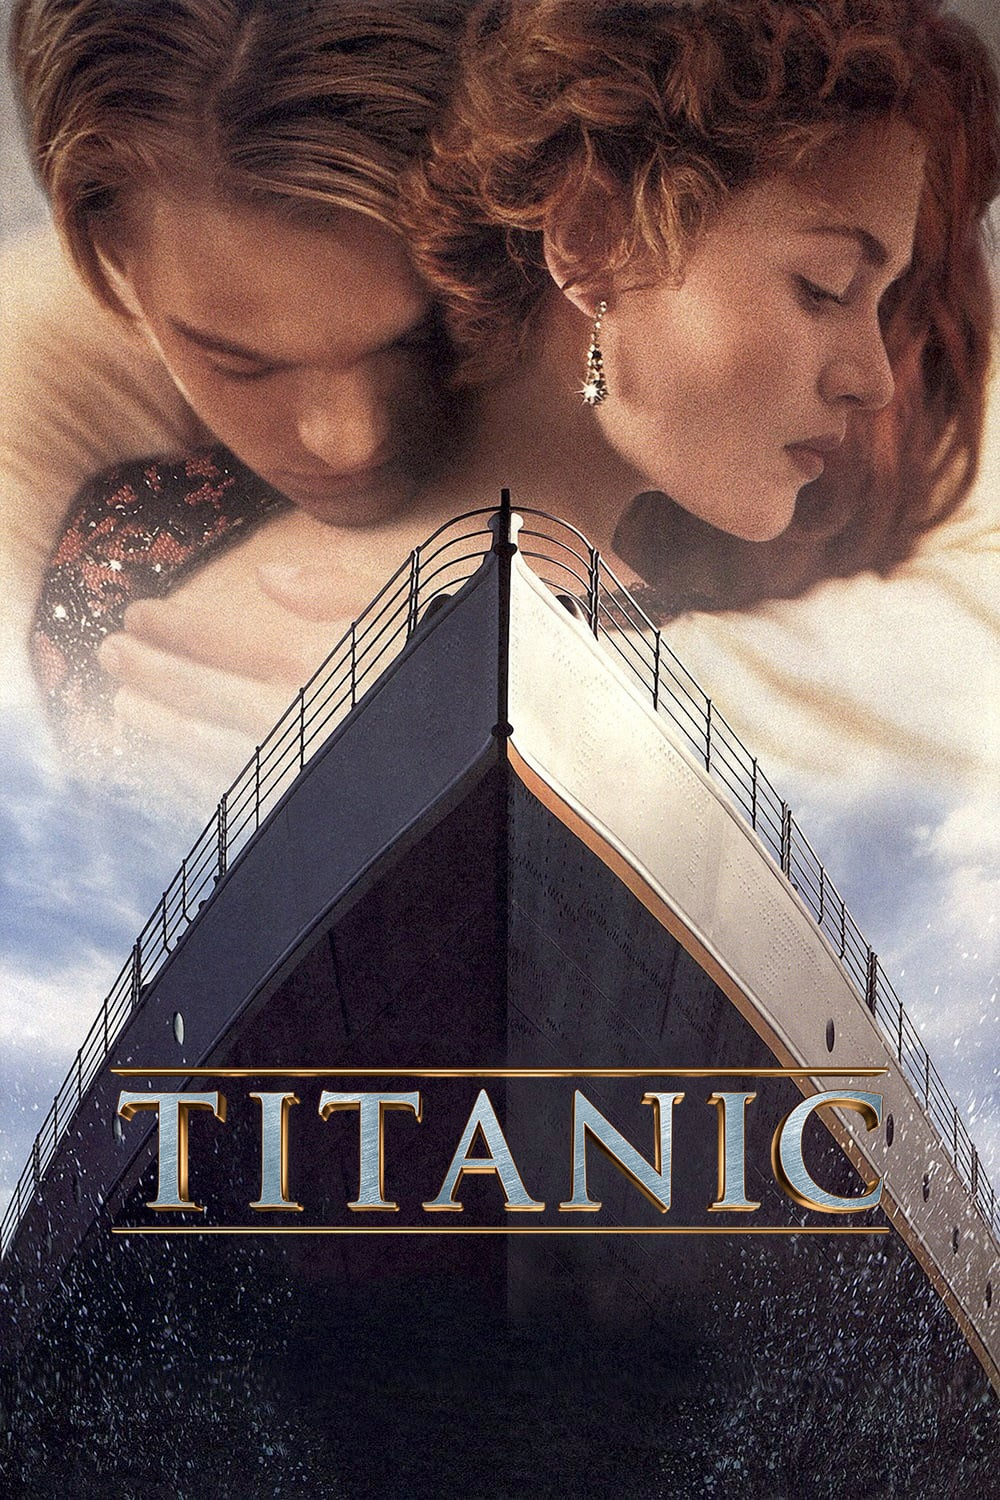

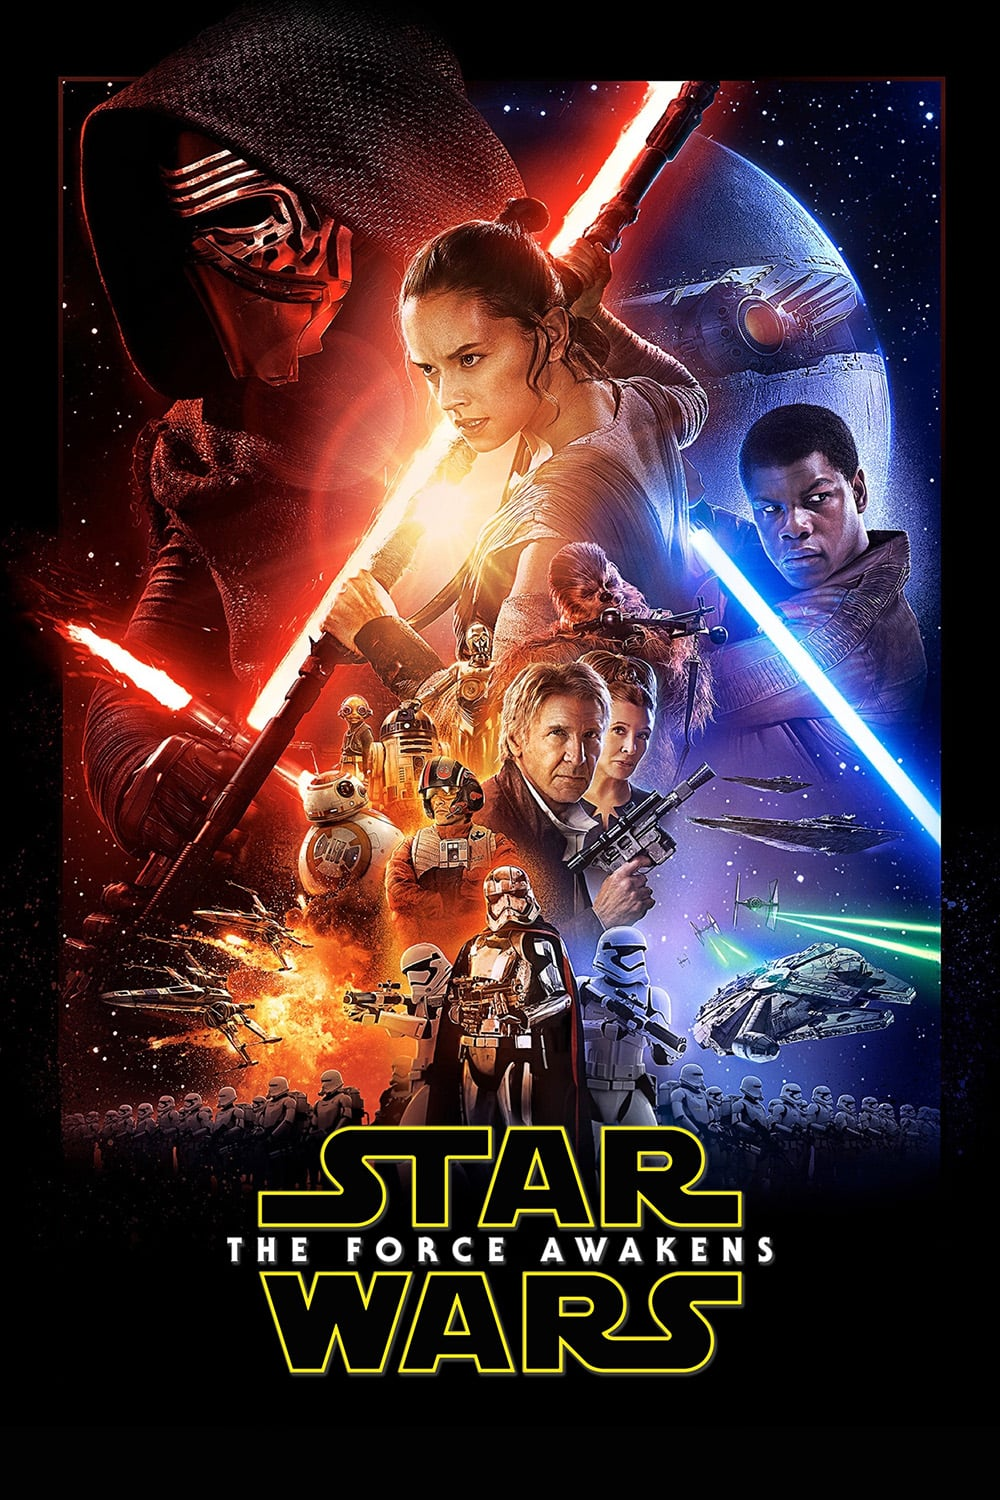

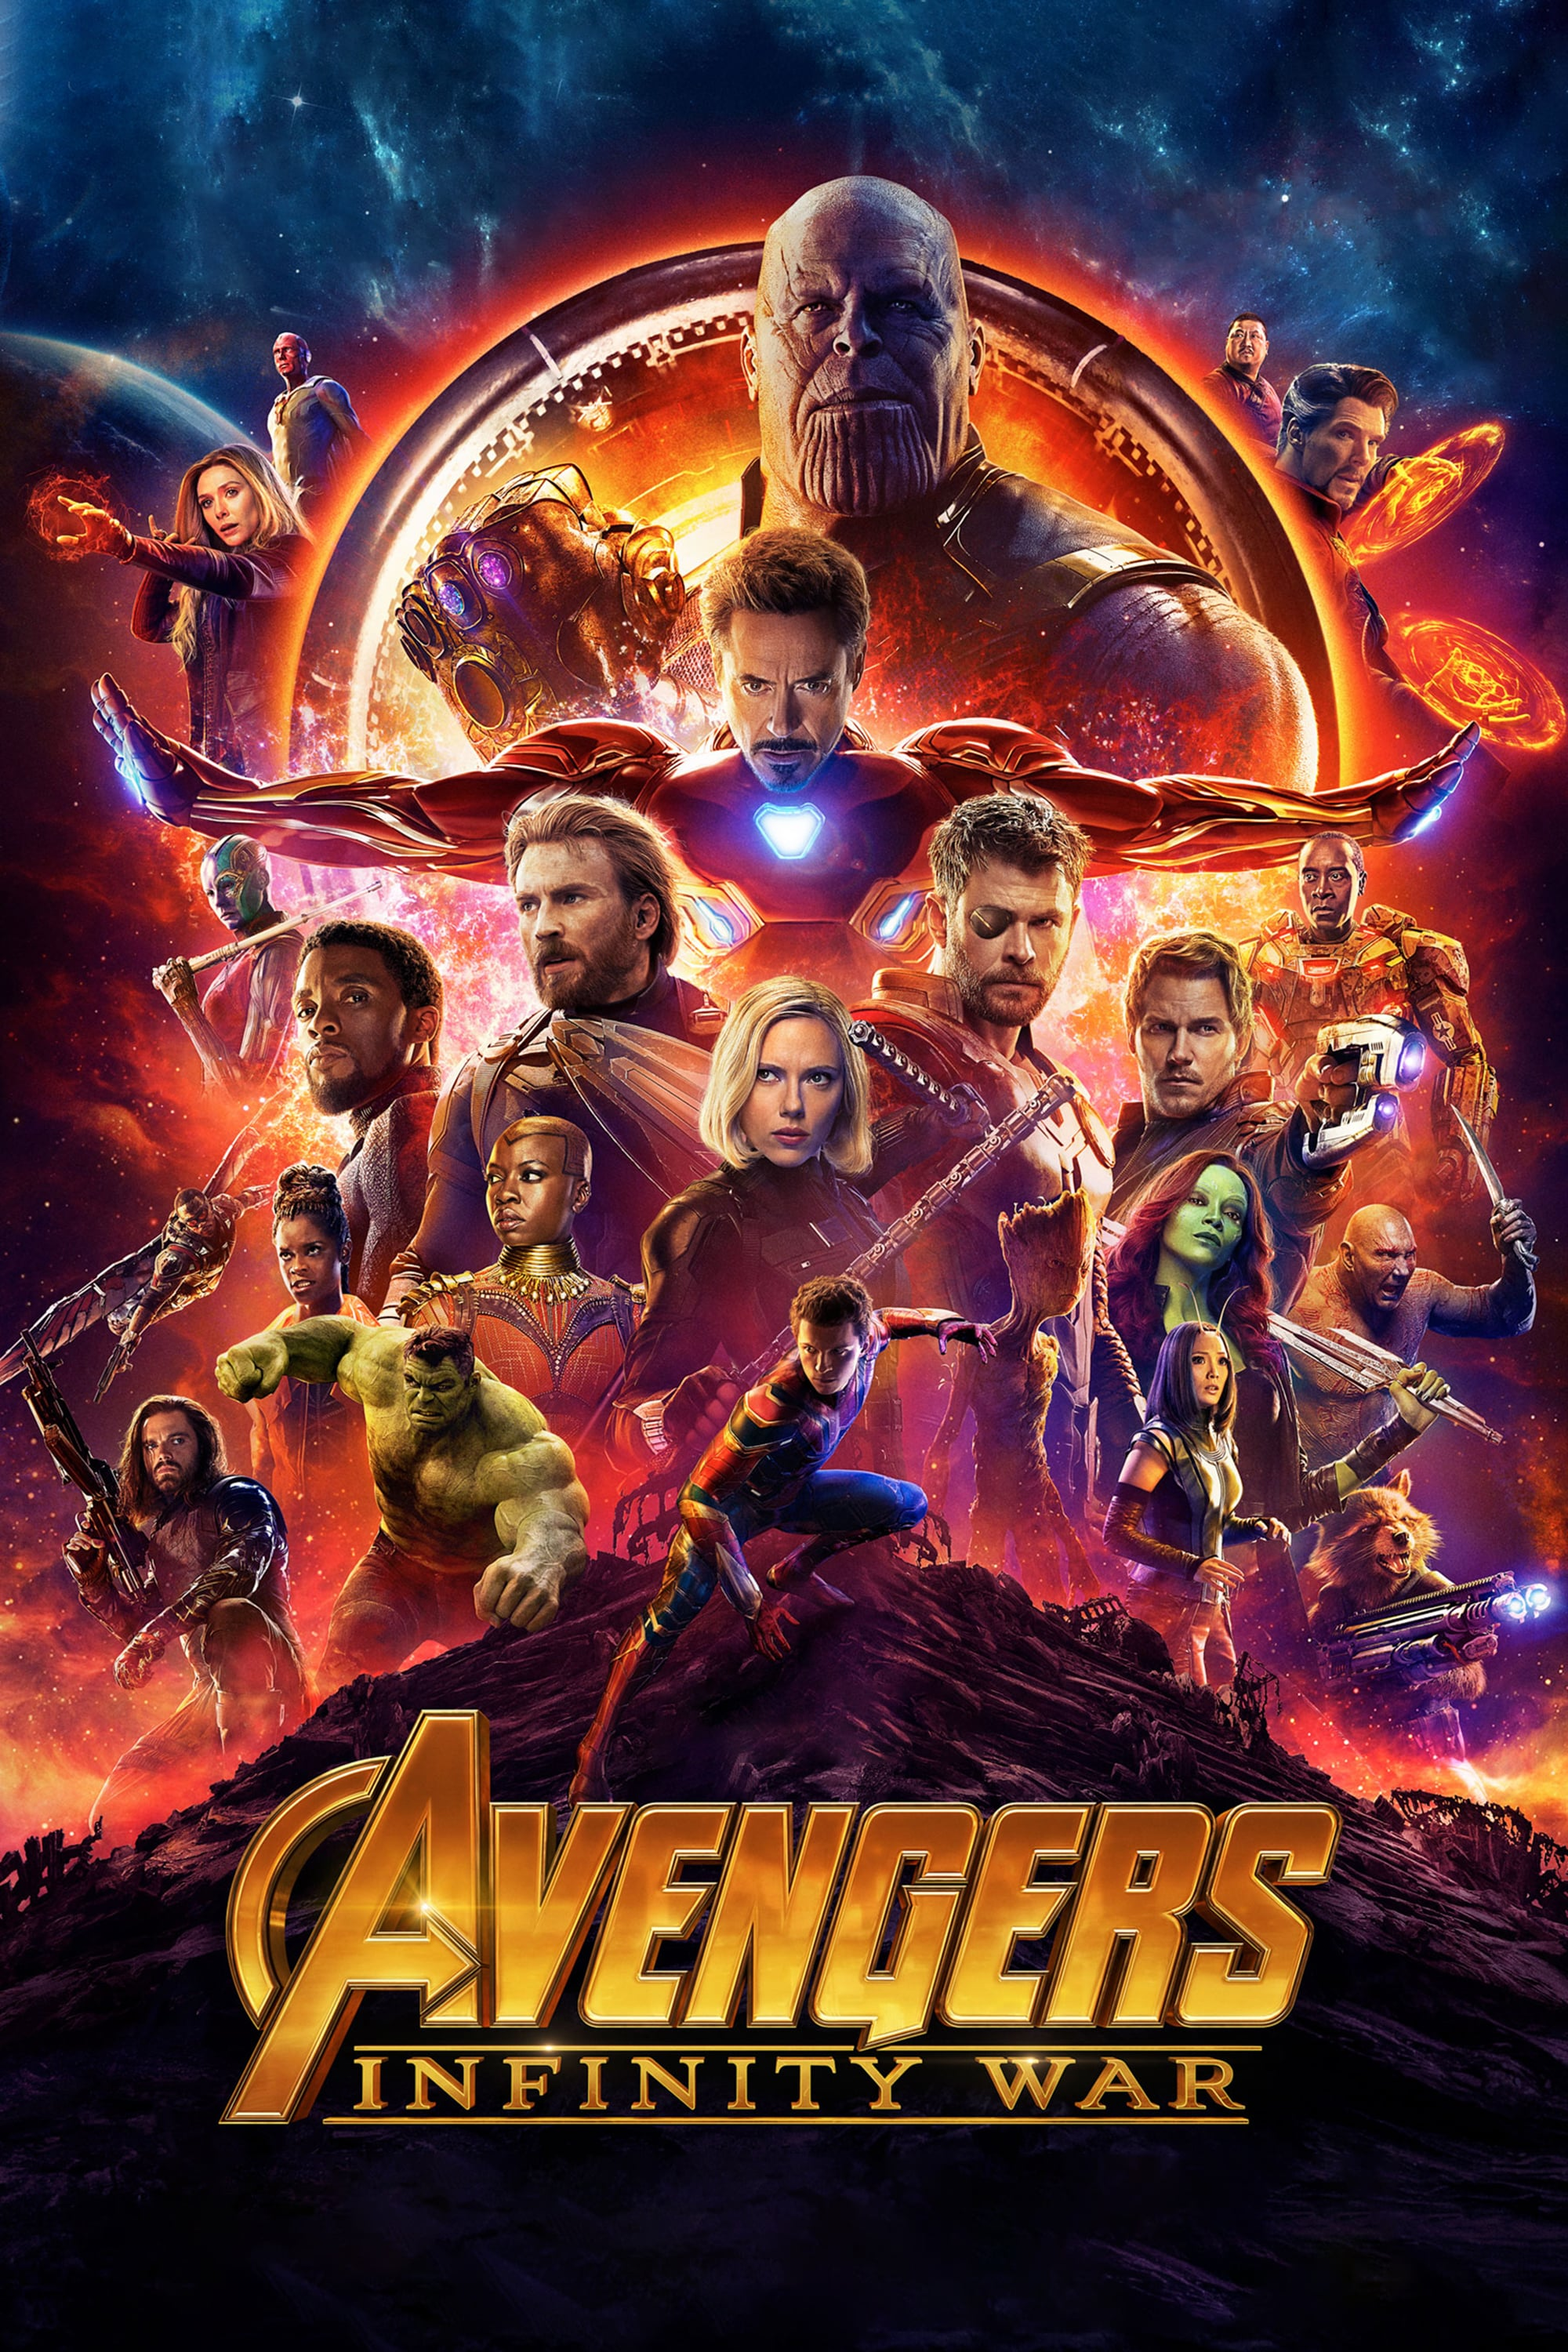

In [48]:
requestIMG(df['imdb_title_id'][0])
requestIMG(df['imdb_title_id'][1])
requestIMG(df['imdb_title_id'][2])
requestIMG(df['imdb_title_id'][3])
requestIMG(df['imdb_title_id'][4])
